In [235]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

* Fecha-I : Fecha y hora programada del vuelo.
* Vlo-I : Número de vuelo programado.
* Ori-I : Código de ciudad de origen programado.
* Des-I : Código de ciudad de destino programado.
* Emp-I : Código aerolínea de vuelo programado.
* Fecha-O : Fecha y hora de operación del vuelo.
* Vlo-O : Número de vuelo de operación del vuelo.
* Ori-O : Código de ciudad de origen de operación
* Des-O : Código de ciudad de destino de operación.
* Emp-O : Código aerolínea de vuelo operado.
* DIA : Día del mes de operación del vuelo.
* MES : Número de mes de operación del vuelo.
* AÑO : Año de operación del vuelo.
* DIANOM : Día de la semana de operación del vuelo.
* TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
* OPERA : Nombre de aerolínea que opera.
* SIGLAORI : Nombre ciudad origen.
* SIGLADES : Nombre ciudad destino.

In [18]:
df = pd.read_csv('dataset_SCL.csv')

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [21]:
df.describe()

DIA           MES           AÑO
count  68206.000000  68206.000000  68206.000000
mean      15.714790      6.622585   2017.000029
std        8.782886      3.523321      0.005415
min        1.000000      1.000000   2017.000000
25%        8.000000      3.000000   2017.000000
50%       16.000000      7.000000   2017.000000
75%       23.000000     10.000000   2017.000000
max       31.000000     12.000000   2018.000000

### Generating aditional features

temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .

○ atraso_15 : 1 si dif_min > 15, 0 si no.

○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

Temporada alta

In [ ]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])

In [63]:
mask_1 = (df['Fecha-I'] > '2017-7-14') & (df['Fecha-I'] < '2017-8-01')
mask_2 = (df['Fecha-I'] > '2017-9-10') & (df['Fecha-I'] < '2017-10-01')
mask_3 = (df['Fecha-I'] > '2016-12-14') & (df['Fecha-I'] < '2017-3-04')
mask_4 = (df['Fecha-I'] > '2017-12-14') & (df['Fecha-I'] < '2018-3-04')

In [76]:
index = df.loc[mask_1 + mask_2 + mask_3 + mask_4].index

In [77]:
df.loc[index ,"temporada_alta"]= 1

In [79]:
df['temporada_alta'].fillna(value = 0, inplace = True)

dif_min

In [85]:
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [167]:
df['dif_min'] = abs(df['Fecha-O'] - df['Fecha-I']).dt.seconds / 60

atraso_15

In [176]:
df['atraso_15'] = df['dif_min'] > 15

periodo_dia

In [216]:
def get_periodo_dia(row):
    if row.hour >= 5 and row.hour < 12:
        return 'mañana'
    elif row.hour >= 12 and row.hour < 19:
        return 'tarde'
    else:
        return 'noche'

In [217]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [220]:
df.loc[250:255]

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
250 2017-01-26 09:20:00  1283  SCEL  SABE   ARG 2017-01-26 09:07:00  1283   
251 2017-01-27 09:20:00  1283  SCEL  SABE   ARG 2017-01-27 09:16:00  1283   
252 2017-01-28 09:20:00  1283  SCEL  SABE   ARG 2017-01-28 09:15:00  1283   
253 2017-01-30 09:20:00  1283  SCEL  SABE   ARG 2017-01-30 09:14:00  1283   
254 2017-01-01 16:45:00  1285  SCEL  SABE   ARG 2017-01-01 16:38:00  1285   
255 2017-01-02 16:45:00  1285  SCEL  SABE   ARG 2017-01-02 16:50:00  1285   

    Ori-O Des-O Emp-O  ...   AÑO   DIANOM  TIPOVUELO                  OPERA  \
250  SCEL  SABE   ARG  ...  2017   Jueves          I  Aerolineas Argentinas   
251  SCEL  SABE   ARG  ...  2017  Viernes          I  Aerolineas Argentinas   
252  SCEL  SABE   ARG  ...  2017   Sabado          I  Aerolineas Argentinas   
253  SCEL  SABE   ARG  ...  2017    Lunes          I  Aerolineas Argentinas   
254  SCEL  SABE   ARG  ...  2017  Domingo          I  Aerolineas Argentinas   
255  SCEL  SABE   ARG  ...  2017    Lunes          I  Aerolineas Argentinas   

     SIGLAORI      SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
250  Santiago  Buenos Aires            1.0    13.0      False       mañana  
251  Santiago  Buenos Aires            1.0     4.0      False       mañana  
252  Santiago  Buenos Aires            1.0     5.0      False       mañana  
253  Santiago  Buenos Aires            1.0     6.0      False       mañana  
254  Santiago  Buenos Aires            1.0     7.0      False        tarde  
255  Santiago  Buenos Aires            1.0     5.0      False        tarde  

[6 rows x 22 columns]

In [222]:
df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']].to_csv('synthetic_features.csv', index=False)

### EDA

In [236]:
df['atraso_15'].value_counts()

False    55592
True     12614
Name: atraso_15, dtype: int64

In [240]:
fig = px.histogram(df, x="atraso_15",
                   hover_data=df.columns)
fig.show()

In [252]:
fig = px.histogram(df, x="atraso_15", color = 'periodo_dia',
                   hover_data=df.columns)
fig.show()

In [267]:
fig = px.histogram(df.loc[df['atraso_15'] == 1], x="MES", color = 'atraso_15',
                   hover_data=df.columns)
fig.show()

In [258]:
fig = px.histogram(df, x="atraso_15", color = 'TIPOVUELO',
                   hover_data=df.columns)
fig.show()

In [259]:
df['OPERA'].nunique()

23

In [270]:
fig = px.histogram(df.loc[df['atraso_15'] == 1], x="OPERA", color = 'atraso_15',
                   hover_data=df.columns)
fig.show()

In [271]:
fig = px.histogram(df.loc[df['atraso_15'] == 1], x="DIANOM", color = 'atraso_15',
                   hover_data=df.columns)
fig.show()

In [280]:
fig = px.histogram(df.loc[df['atraso_15'] == 1], x="Emp-I", color = 'atraso_15',
                   hover_data=df.columns)
fig.show()

In [283]:
fig = px.histogram(df.loc[df['atraso_15'] == 1], x="SIGLADES", color = 'atraso_15',
                   hover_data=df.columns)
fig.show()

In [288]:
df.loc[df['atraso_15'] == 1]['SIGLADES'].value_counts(normalize=True)[:10]

Buenos Aires    0.128429
Lima            0.096242
Sao Paulo       0.069843
Antofagasta     0.067148
Puerto Montt    0.058189
Iquique         0.050737
Calama          0.049865
Concepcion      0.049390
Mendoza         0.035120
Bogota          0.032900
Name: SIGLADES, dtype: float64

In [306]:
top5_ciudades = list(df.loc[df['atraso_15'] == 1]['SIGLADES'].value_counts(normalize=True)[:10].index[:5])

In [307]:
top5_ciudades

['Buenos Aires', 'Lima', 'Sao Paulo', 'Antofagasta', 'Puerto Montt']

In [272]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia'],
      dtype='object')

In [317]:
df['Vlo-I'].value_counts()[:10]

174    686
11     645
116    608
150    557
162    553
164    550
704    515
118    508
172    498
170    495
Name: Vlo-I, dtype: int64

In [282]:
for col in df.columns:
    print(f'{col} ---> {df[col].nunique()}')
    print('-'*20)

Fecha-I ---> 53252
--------------------
Vlo-I ---> 750
--------------------
Ori-I ---> 1
--------------------
Des-I ---> 64
--------------------
Emp-I ---> 30
--------------------
Fecha-O ---> 62774
--------------------
Vlo-O ---> 866
--------------------
Ori-O ---> 1
--------------------
Des-O ---> 63
--------------------
Emp-O ---> 32
--------------------
DIA ---> 31
--------------------
MES ---> 12
--------------------
AÑO ---> 2
--------------------
DIANOM ---> 7
--------------------
TIPOVUELO ---> 2
--------------------
OPERA ---> 23
--------------------
SIGLAORI ---> 1
--------------------
SIGLADES ---> 62
--------------------
temporada_alta ---> 2
--------------------
dif_min ---> 162
--------------------
atraso_15 ---> 2
--------------------
periodo_dia ---> 3
--------------------


Quality Checks

In [289]:
df['AÑO'].unique()

array([2017, 2018], dtype=int64)

In [290]:
df['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [291]:
df['DIANOM'].unique()

array(['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Sabado',
       'Viernes'], dtype=object)

In [292]:
df['DIA'].unique()

array([ 1,  2,  3,  4,  5,  7,  8, 10, 12, 14, 16, 18, 21, 23, 25, 28, 30,
        6,  9, 11, 13, 15, 17, 19, 22, 24, 26, 27, 29, 31, 20],
      dtype=int64)

In [295]:
fig = px.box(df.loc[df['atraso_15'] == 1], y="dif_min")
fig.show()

In [299]:
fig = px.histogram(df.loc[(df['SIGLADES'] == 'Buenos Aires') & (df['atraso_15'] == 1)], x="dif_min",
                   hover_data=df.columns)
fig.show()

In [300]:
fig = px.histogram(df.loc[(df['SIGLADES'] == 'Lima') & (df['atraso_15'] == 1)], x="dif_min",
                   hover_data=df.columns)
fig.show()

In [313]:
fig = px.histogram(df.loc[(df['SIGLADES'].isin(top5_ciudades)) & (df['atraso_15'] == 1) ], x="dif_min",
                   color = 'SIGLADES' ,hover_data=df.columns)
fig.show()

In [311]:
df.loc[(df['SIGLADES'].isin(top5_ciudades)) & (df['atraso_15'] == 1) ]

Buenos Aires    6335
Antofagasta     5786
Lima            5270
Puerto Montt    4357
Sao Paulo       3569
Name: SIGLADES, dtype: int64

Decision tree for gaining insights regarding feature importances

In [318]:
from sklearn.ensemble import ExtraTreesClassifier

Columns removed

* Vlo-I 
* Vlo-O 

* Ori-I 
* Ori-O 

* Fecha-I 
* Fecha-O 

In [326]:
features = df.drop(['Vlo-I', 'Vlo-O', 'Ori-I', 'Ori-O', 'Fecha-I', 'Fecha-O', 'atraso_15', 'dif_min'], axis=1)

In [327]:
features.columns

Index(['Des-I', 'Emp-I', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM',
       'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta',
       'periodo_dia'],
      dtype='object')

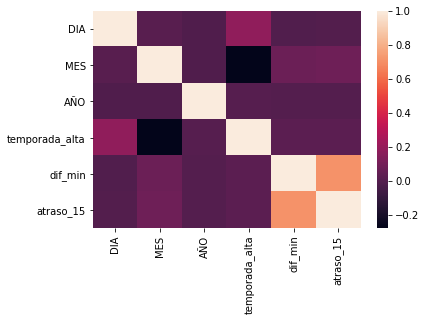

In [325]:
sns.heatmap(df.corr())

In [331]:
df['atraso_15'] = df['atraso_15'].apply(lambda x : 1 if x == True else 0)

In [ ]:
X = features
y = df['atraso_15']

In [336]:
from sklearn.preprocessing import OrdinalEncoder

In [337]:
ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit(X)
X = ordinal_encoder.transform(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [333]:
from sklearn.tree import DecisionTreeClassifier

In [339]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

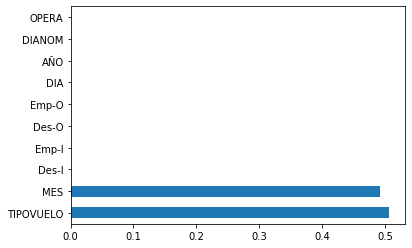

In [349]:
# get importance
importance = tree_clf.feature_importances_

feat_importances = pd.Series(tree_clf.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')

Random Forest for feature importances

In [352]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, criterion='entropy', random_state=0)

forest.fit(X, y)

importances = forest.feature_importances_
tree_importances = np.array([tree.feature_importances_ for tree in forest.estimators_])
indices = np.argsort(importances)[::-1]

df_imp = pd.DataFrame([tree.feature_importances_ for tree in forest.estimators_], columns = features.columns)

# Sort columns by importance
df_imp = df_imp[[features.columns[i] for i in indices.tolist()]]
df_imp.head()

DIA    DIANOM       MES  periodo_dia     Des-I     Des-O  SIGLADES  \
0  0.393155  0.197303  0.140679     0.058498  0.043716  0.033811  0.038803   
1  0.368727  0.172529  0.187536     0.044852  0.049172  0.051047  0.054225   
2  0.401131  0.205779  0.189151     0.037754  0.044710  0.029936  0.029187   
3  0.413150  0.215077  0.169115     0.023188  0.034099  0.025752  0.027379   
4  0.391405  0.201837  0.221557     0.005759  0.030892  0.036791  0.023464   

      Emp-O     Emp-I     OPERA  temporada_alta  TIPOVUELO       AÑO  SIGLAORI  
0  0.033188  0.020054  0.017746        0.015132   0.007832  0.000084       0.0  
1  0.025230  0.016144  0.014966        0.000877   0.014681  0.000013       0.0  
2  0.010849  0.010516  0.007350        0.020295   0.013331  0.000010       0.0  
3  0.024585  0.020971  0.014980        0.014985   0.016648  0.000069       0.0  
4  0.026179  0.014242  0.013301        0.023645   0.010864  0.000065       0.0

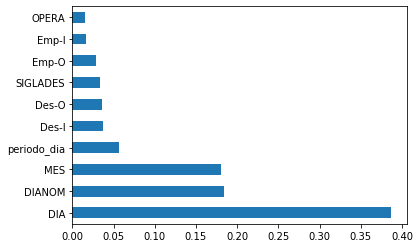

In [357]:
feat_importances_forest = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances_forest.nlargest(10).plot(kind='barh')